In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R
# https://www.statology.org/multivariate-normality-test-r/
libs = list("MASS", "QuantPsyc") # "MVN"
lapply(libs, function(x) install.packages(x))

In [ ]:
%%R
library(MASS)
library(QuantPsyc)

# Ejemplo 1: Granolas

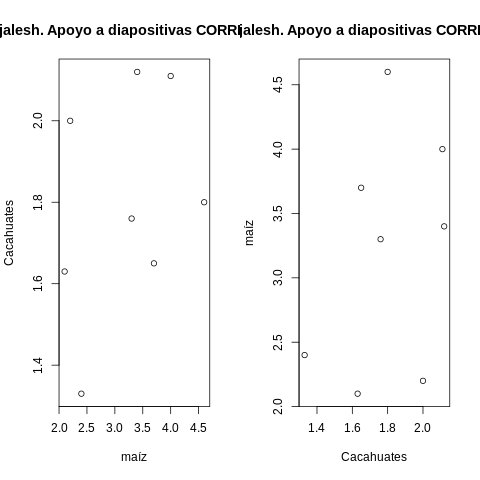

In [4]:
%%R
maíz <- c(2.4, 3.4, 4.6, 3.7, 2.2, 3.3,  4.0, 2.1)
Cacahuates <- c(1.33, 2.12, 1.8, 1.65, 2.0, 1.76, 2.11,1.63)

par(mfrow=c(1,2))
plot(maíz, Cacahuates,main="lfgrajalesh. Apoyo a diapositivas CORRELACIÓN")
plot(Cacahuates, maíz, main="lfgrajalesh. Apoyo a diapositivas CORRELACIÓN")

## Test de Mardia
+ Ho: el vector aleatorio proviene de una normal bivariada.
+ Ha: el vector aleatorio NO proviene de una normal bivariada.

valores.p: 0.95 (Skewness) y 0.32 (Kurtosis)

In [5]:
%%R
GRANOLAS = data.frame (cbind(maíz, Cacahuates))
GRANOLAS
#MVN::mvn(GRANOLAS) 

  maíz Cacahuates
1  2.4       1.33
2  3.4       2.12
3  4.6       1.80
4  3.7       1.65
5  2.2       2.00
6  3.3       1.76
7  4.0       2.11
8  2.1       1.63


In [6]:
%%R
mult.norm(GRANOLAS)$mult.test

          Beta-hat      kappa     p-val
Skewness 0.2115354  0.2820472 0.9909434
Kurtosis 3.9821974 -1.4205077 0.1554599


In [ ]:
!pip3 install pingouin

In [8]:
%R -o GRANOLAS GRANOLAS <- GRANOLAS
# H0: The variables follow a multivariate normal distribution.
# Ha: The variables do not follow a multivariate normal distribution.

import pingouin as pg
pg.multivariate_normality(GRANOLAS, alpha=.05)

HZResults(hz=0.14636864687324636, pval=0.943170267893681, normal=True)

## Coeficiente de correlación

+ $H_0$: rho es cero. 
+ $H_a$: rho es distinto de cero. 

In [9]:
%%R
# No rechazo H0. (ó rho puede ser cero (valor.p=0.4))
# r = 0.35 (Interpretar significancia y signo).
cor.test(maíz, Cacahuates, data="GRANOLAS") 


	Pearson's product-moment correlation

data:  maíz and Cacahuates
t = 0.90706, df = 6, p-value = 0.3993
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4732094  0.8451265
sample estimates:
      cor 
0.3472602 



#Ejemplo 2: Cigarrillos

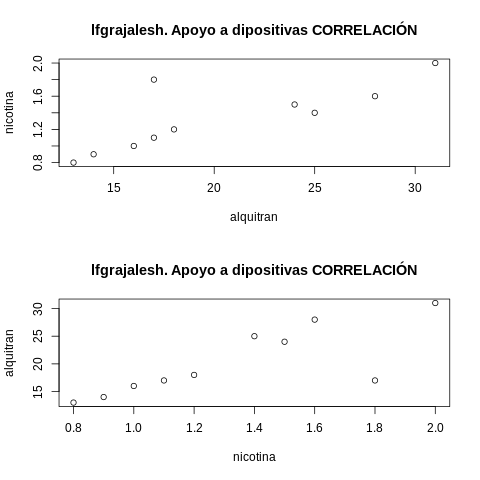

In [10]:
%%R
alquitran=c(14,17,28,17,16,13,24,25,18,31)
nicotina=c(0.9,1.1,1.6,1.8,1.0,0.8,1.5,1.4,1.2,2)
par(mfrow=c(2,1))
plot(alquitran,nicotina,main="lfgrajalesh. Apoyo a dipositivas CORRELACIÓN")
plot(nicotina, alquitran, main="lfgrajalesh. Apoyo a dipositivas CORRELACIÓN")

## Test de Normalidad Multivariada

In [11]:
%%R
cigarrillo = data.frame (cbind(alquitran,nicotina))
cigarrillo
# MVN::mvn(cigarrillo) 

   alquitran nicotina
1         14      0.9
2         17      1.1
3         28      1.6
4         17      1.8
5         16      1.0
6         13      0.8
7         24      1.5
8         25      1.4
9         18      1.2
10        31      2.0


In [12]:
%%R
mult.norm(cigarrillo)$mult.test

         Beta-hat      kappa     p-val
Skewness 3.746282  6.2438037 0.1816657
Kurtosis 7.399827 -0.2372393 0.8124712


In [13]:
%R -o cigarrillo cigarrillo <- cigarrillo
# H0: The variables follow a multivariate normal distribution.
# Ha: The variables do not follow a multivariate normal distribution.
pg.multivariate_normality(cigarrillo, alpha=.05)

HZResults(hz=0.800745311165092, pval=0.013327896282863424, normal=False)

## Coeficiente de correlación

1) p.value= 0.002 

2) sample estimates:

    rho 
    0.8389097 

In [14]:
%%R
cor.test(alquitran, nicotina, data="cigarrillo", method="spearman") 


	Spearman's rank correlation rho

data:  alquitran and nicotina
S = 26.58, p-value = 0.002414
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8389097 

